In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

from IPython.display import HTML

from copy import deepcopy
import os
import sys
from functools import reduce
sys.path.append("/home/ful7rng/projects/transition/propagation")
from utils import pickle_load, get_npy, get_file
from utils.occ_map_utils import load_map, show_map, plot_occ_map, plot_trajectories, free_space
from utils.scene_utils import display_scenes_trajs, animate_scenes, get_scenes
from propagation.bofum import conditionalBOFUM, naiveBOFUM, BOFUMRealdata
from propagation.animation import TrackingAnimRealdata
from data_loader import get_map_crop

In [31]:
sample_rate = 3
scene= get_scenes(random_file=True,
                  min_time_interval=3,
                  max_time_interval=4,
                  sample_rate=sample_rate,
                  file_name=None)[0][0]
map_ = scene.static_map

Found 194 files in total
load file: /local/data/scenes/100_11/mimo/05_16/2017-05-16-13-35-03_13.npy
Found 39 scenes in total
36
48
Found 8 scenes (= 20.513%) whose interval is in range (3, 4)
Found 0 scenes (= 0.000%) whose interval does not match number of hits.


In [36]:
BOFUMRealdata.scene_preprocessing(scene)

In [37]:
extent = 7
window_size = 4
ma_speeds = np.zeros((window_size, extent, extent), dtype=float)

In [113]:
occ_cells = np.array(np.where(scene.hits[0])).T
for (x, y) in occ_cells:
    print(x, y)

(26, 18)
(26, 19)


In [95]:
def vel_between_hits(hit_2, hit_1, extent):
    h_extent = extent // 2
    padded_hit_1 = np.pad(hit_1, ((h_extent, h_extent), (h_extent, h_extent)), mode='constant', constant_values=0)
    plt.figure()
    show_map(hit_2)
    plt.suptitle("hit_2")
    plt.figure()
    show_map(hit_1)
    plt.suptitle("hit_1")
    plt.figure()
    show_map(hit_1 - hit_2)
    plt.suptitle("hit_1 - hit_2")
    occ_cells = np.array(np.where(hit_2)).T
    print(occ_cells)
    print(np.array(np.where(hit_1)).T)
    occ_cells += np.array([h_extent, h_extent])
    print("hit_2 has {} occupied cells".format(len(occ_cells)))
    v = np.zeros((extent, extent), dtype=float)
    for cell in occ_cells:
        x, y = cell[0], cell[1]
        print(cell)
        neighbors = padded_hit_1[x-h_extent:x+h_extent+1, y-h_extent:y+h_extent+1].copy()
        neighbors[h_extent, h_extent] = 0
#         plt.figure()
#         show_map(neighbors)
        v += neighbors
    with np.errstate(divide='ignore', invalid='ignore'):
        v /= v.sum()
        v[~np.isfinite(v)] = 0
    plt.figure()
    show_map(v)
    plt.suptitle("v")
    print("v sums to {}".format(v.sum()))
    return v

In [91]:
scene.hits[0].shape

(32, 32)

In [92]:
i = 0

[[21 16]
 [22 17]]
[[19 15]
 [19 16]
 [21 16]
 [21 17]]
hit_2 has 2 occupied cells
[24 19]
[25 20]
v sums to 1.0


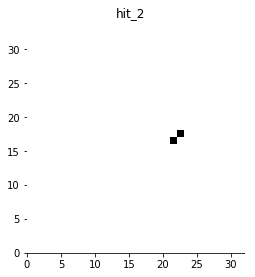

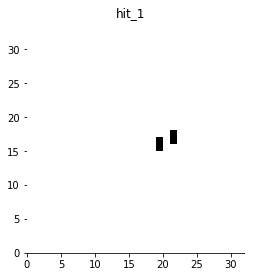

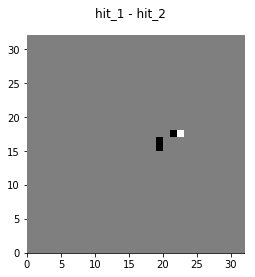

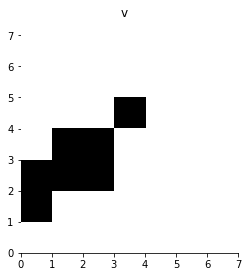

In [101]:
v = vel_between_hits(scene.hits[i], scene.hits[i+1], extent)
i += 1
    

In [102]:
i = 0

[[19 15]
 [19 16]]
[[16 15]
 [16 16]]
hit_2 has 2 occupied cells
[22 18]
[22 19]
v sums to 1.0


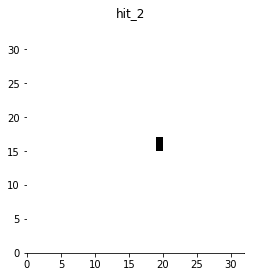

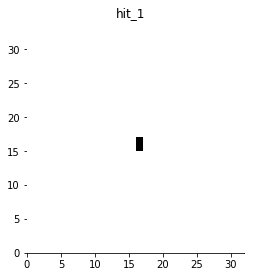

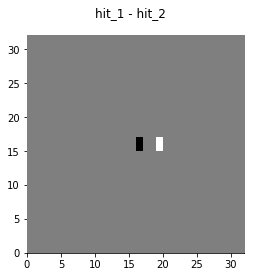

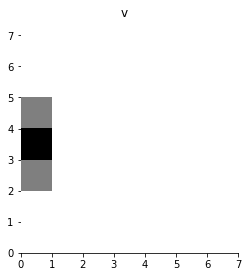

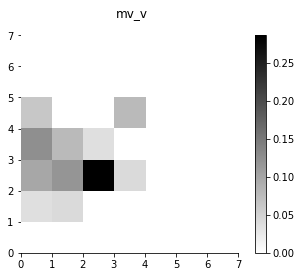

In [112]:

v = vel_between_hits(scene.hits[i], scene.hits[i+1], extent)
ma_speeds[:len(ma_speeds)-1] = ma_speeds[1:]
ma_speeds[-1] = v
ma_v = np.sum(ma_speeds, axis=0)
with np.errstate(divide='ignore', invalid='ignore'):
    ma_v /= ma_v.sum()
    ma_v[~np.isfinite(ma_v)] = 0
plt.figure()
ax = show_map(ma_v)
plt.suptitle("mv_v")
plt.colorbar(ax)
i += 1

In [94]:
print(v)

[[ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0. ]]


In [95]:
def vel_between_hits(hit_2, hit_1, extent):
    h_extent = extent // 2
    padded_hit_1 = np.pad(hit_1, ((h_extent, h_extent), (h_extent, h_extent)), mode='constant', constant_values=0)
    plt.figure()
    show_map(hit_2)
    plt.suptitle("hit_2")
    plt.figure()
    show_map(hit_1)
    plt.suptitle("hit_1")
    plt.figure()
    show_map(hit_1 - hit_2)
    plt.suptitle("hit_1 - hit_2")
    occ_cells = np.array(np.where(hit_2)).T
    print(occ_cells)
    print(np.array(np.where(hit_1)).T)
    occ_cells += np.array([h_extent, h_extent])
    print("hit_2 has {} occupied cells".format(len(occ_cells)))
    v = np.zeros((extent, extent), dtype=float)
    for cell in occ_cells:
        x, y = cell[0], cell[1]
        print(cell)
        neighbors = padded_hit_1[x-h_extent:x+h_extent+1, y-h_extent:y+h_extent+1].copy()
        neighbors[h_extent, h_extent] = 0
#         plt.figure()
#         show_map(neighbors)
        v += neighbors
    with np.errstate(divide='ignore', invalid='ignore'):
        v /= v.sum()
        v[~np.isfinite(v)] = 0
    plt.figure()
    show_map(v)
    plt.suptitle("v")
    print("v sums to {}".format(v.sum()))
    return v